# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?`, `Age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`. 

In [1]:
import pandas as pd
import numpy as np
#Мне было лениво менять символ в каждом слове с двух сторон, так что я сделал функцию, которая это сделала. Требуется это для того, чтобы заголовки вставить дальше
a = str('`surgery?`, `age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`').strip('`').lower().replace('?','').split('`, `')
print(a)

['surgery', 'age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']


Отсутствующие значения в данных отражаются вопросительными знаками, оттого используем na_values

In [2]:
df = pd.read_csv('horse_data.txt', na_values='?')
df.head()

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


Заголовки отсутствуют, так что вырежем столбцы по индексам и вставим названия вручную

In [3]:
df = df.iloc[:,[0,1,3,4,5,6,10,22]]
df.columns = a

Проверим верность наших действий

In [4]:
df.head()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Посмотрим на общие показатели датафрейма

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     298 non-null    float64
 1   age                         299 non-null    int64  
 2   rectal temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   pain                        244 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


Всего у нас 299 строк, все столбцы числовые, присутствуют отсутствующие, пока проведем расчеты не изменяя данные. получим все требуемые значения

In [6]:
df.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,298.000000,299.00000,239.000000,275.000000,241.000000,243.000000,244.000000,298.000000
mean,1.395973,1.64214,38.166527,71.934545,30.427386,2.345679,2.942623,1.550336
std,0.489881,2.17730,0.733508,28.680522,17.678256,1.046369,1.303993,0.737967
min,1.000000,1.00000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.00000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.00000,38.200000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.00000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,9.00000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


Согласно информации представленной выше можно сделать следующие выводы:
- Столбец Surgery заполнен корректно
- В солбце Age есть ошибки, этот показатель не может согласно документации принимать значения выше 2. Скорее всего в иных значениях вводилос количество лет или месяцев. К сожалению однозначно ответить невозможно, поскольку средний срок жизни лошади 20-40 лет, а сколько они находились под наблюдением ответить невозможно без анализа бизнеса
- Rectal temperature так же в пределах допустимых значений
- Средний пульс у жеребят нормой являются показатели 70-120 ударов в минуту, у годовиков - 45-50. Так что вроде все в допустимых значениях. Конечно тут лучше посмотреть как далеки отклонения по boxplot, что мы и сделаем дальше
- respiratory rate так же выглядит в пределах нормы что будет проверено дальше
- temperature of extremities так же в норме
- pain то же в норме
- outcome в норме

In [7]:
df.loc[df['age'] > 2]['age'].value_counts()

9    24
Name: age, dtype: int64

Это довольно странно. Все значения равны девяти. Скорее всего это ошибка не внесения, а самой системы. Предпочту удалить на основании этого

In [8]:
df = df.loc[df['age'] <= 2]
df

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
5,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
294,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
295,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
296,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
297,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


Теперь посмотрим на боксплоты

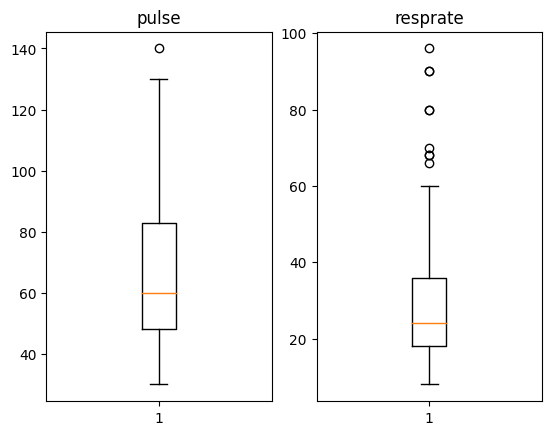

In [9]:
import matplotlib.pyplot as plt

df_nonan = df[['pulse', 'respiratory rate']].dropna()

fig, (bp1,bp2) = plt.subplots(1,2)

bp1.boxplot(list(df_nonan['pulse']))
bp2.boxplot(df_nonan['respiratory rate'])

bp1.set_title('pulse')
bp2.set_title('resprate')

plt.show()

В целом каких-то сумасшедших выбросов тут не видно. Опять же это требуется уточнять у докторов и специалистов в данной области

### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [10]:
for column, number in dict(df.count()).items():
    print('В колонке {} {} NaN'.format(column, 275-number))

В колонке surgery 1 NaN
В колонке age 0 NaN
В колонке rectal temperature 56 NaN
В колонке pulse 22 NaN
В колонке respiratory rate 54 NaN
В колонке temperature of extremities 48 NaN
В колонке pain 48 NaN
В колонке outcome 1 NaN


На самом деле очень сложно сделать выводы о заполнении некоторых значений, поскольку мы не знаем что для нас важнее. Исходя из стат. значений выше:

- surgery можем рассмотреть индивидуально и принять решение на основании показателя боли. Цитата: `In general, the more painful, the more likely it is to require surgery`
- age заполнен полностью
- rectal temperature надо посмотреть. Cогласно документу - `normal temp is 37.8`, а также `hot extremities should correlate with an elevated rectal temp.`, а еще `this parameter will usually change as the problem progresses` и `temperature may be reduced when the animal is in late shock`, следовательно ищем зависимости между этим значением, temperature of extremites, а также уровнем боли. Всем остльным дадим нормальную температуру.
- pulse проанализируем на основании: `rare to have a lower than normal rate although athletic horses may have a rate of 20-25` и `animals with painful lesions or suffering from circulatory shock may have an elevated heart rate`. Учтем что `30-40 is normal for adult`
- respiratory rate заполним медианой, поскольку `usefulness is doubtful due to the great fluctuations`
- temperature of extremities тут надо посмотреть, поскольку цитата: `hot extremities should correlate with an elevated rectal temp.` а также `cool to cold extremities indicate possible shock`
- pain отражает силу боли напрямую, но документ отмечает что `should NOT be treated as a ordered or discrete variable!` а также `In general, the more painful, the more likely it is to require surgery`, что позволяет определить заполнение 1 столбца, `cool to cold extremities indicate possible shock`
- outcome так же рассмотрим индивидуально, поскольку значения вообще не сравниваемые. 1 - выжил, 2 - умер, 3 - эвтаназия.

**Сразу перед стартом подчеркну что решения в функциях не самые изящные. что я понял под конец, но переписывать всё займет слишком много вреиени**

Surgery

In [11]:
df.loc[df['surgery'].isna()]

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
131,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


Как мы можем заметить - пропуск в surgery там же где и в outcome. Pain описывается как `intermittent severe pain`, что подразумевает высокую вероятность операции. Зависят ли как то операция и outcome? Проведем анализ исходя из моды, поскольку медиану и среднее будет некорректно использовать в качественных номинальных значениях

In [12]:
df[['surgery', 'outcome']].groupby('surgery')['outcome'].agg(pd.Series.mode)

surgery
1.0    1.0
2.0    1.0
Name: outcome, dtype: float64

Вывод - заполняем outcome единицей в любом из случаев, поскольку это самый часто встречающийся вариант

Теперь rectal temperature. Согласно вышеописанному мы можем заполнить на основании следующих столбцов по убыванию важности:
- temperature of extremites
- pain

То есть есть 4 категории. Где влияет всё, влияет по одному из 2 параметров и ничего. Всем остальным можем присвоить нормальное значение.

In [13]:
df_rect_on_ext_pain = df.loc[df['rectal temperature'].isna() &  ~(df['temperature of extremities'].isna() & df['rectal temperature'].isna())&  ~(df['pain'].isna() & df['rectal temperature'].isna())]
temp_index_set = set(df_rect_on_ext_pain.index)
df_rect_on_ext = df.loc[df['rectal temperature'].isna() &  ~(df['temperature of extremities'].isna() & df['rectal temperature'].isna())].drop(index=temp_index_set, errors='ignore')
temp_index_set = set(list(df_rect_on_ext.index) + list(df_rect_on_ext_pain.index))
df_rect_on_pain = df.loc[df['rectal temperature'].isna() &  ~(df['pain'].isna() & df['rectal temperature'].isna())].drop(index=temp_index_set, errors='ignore')
temp_index_set = set(list(df_rect_on_ext.index) + list(df_rect_on_pain.index) + list(df_rect_on_ext_pain.index))
df_rect_norm = df.loc[df['rectal temperature'].isna()].drop(index=temp_index_set, errors='ignore')


In [14]:
df_reference = df.groupby(['temperature of extremities', 'pain'])['rectal temperature'].mean()
df_reference

temperature of extremities  pain
1.0                         1.0     38.037500
                            2.0     38.030769
                            3.0     38.208696
                            4.0     37.950000
                            5.0     38.133333
2.0                         1.0     38.140000
                            2.0     38.400000
                            3.0     37.955556
                            4.0     38.250000
                            5.0           NaN
3.0                         1.0     38.014286
                            2.0     38.811111
                            3.0     37.962500
                            4.0     37.721429
                            5.0     38.050000
4.0                         2.0     38.566667
                            3.0     38.250000
                            4.0     38.500000
                            5.0     38.600000
Name: rectal temperature, dtype: float64

In [15]:
df_reference_temp_ext = df.groupby('temperature of extremities')['rectal temperature'].mean()
df_reference_temp_ext

temperature of extremities
1.0    38.093846
2.0    38.203846
3.0    38.147945
4.0    38.421053
Name: rectal temperature, dtype: float64

In [16]:
df_reference_pain = df.groupby('pain')['rectal temperature'].mean()
df_reference_pain

pain
1.0    38.097143
2.0    38.411111
3.0    38.073684
4.0    37.900000
5.0    38.110526
Name: rectal temperature, dtype: float64

In [17]:
normal_temp = 37.8
normal_temp

37.8

Так и присвоим, раз есть корреляция согласно документам. Создадим функцию применив которую мы сможем это организовать

In [18]:
def rect_temp_value_fill(row):

    if pd.isnull(row['temperature of extremities']) and pd.isnull(row['pain']) and pd.isnull(row['rectal temperature']):
        return normal_temp
        
    elif pd.isnull(row['pain']) and pd.isnull(row['rectal temperature']):
        for temp_of_ext in range(1,5):
            if row['temperature of extremities'] == temp_of_ext:
                return df_reference_temp_ext[temp_of_ext]
                

    elif pd.isnull(row['temperature of extremities']) and pd.isnull(row['rectal temperature']):
        for pain_lvl in range(1,6):
            if row['pain'] == pain_lvl:
                return df_reference_pain[pain_lvl]

    elif pd.isnull(row['rectal temperature']):
        for temp_of_ext in range(1,5):
            if row['temperature of extremities'] == temp_of_ext:
                for pain_lvl in range(1,6):
                    if temp_of_ext == 2 and pain_lvl == 5:
                        return normal_temp
                    elif int(row['pain']) == pain_lvl:
                        if temp_of_ext in [1,2]:
                            return df_reference[temp_of_ext][pain_lvl]
                        else:
                            return df_reference_pain[pain_lvl]
                    
        
        
    else:
        return row['rectal temperature']

Теперь заполняем pulse. На основании `animals with painful lesions or suffering from circulatory shock may have an elevated heart rate` берем зависимость от боли. Это не температура и дробной быть не может так что будем брать медиану

У нас есть 2 варианта. Либо оба значения отсуствтуют, либо есть pain. Заполним 2 методами

В случаях когда боль неизвестна будем брать обычный пульс

In [19]:
normal_pulse = 35
df_ref_pulse_pain = df.groupby('pain')['pulse'].median()
df_ref_pulse_pain

pain
1.0    48.0
2.0    72.0
3.0    55.0
4.0    77.5
5.0    88.0
Name: pulse, dtype: float64

In [20]:
def pulse_fill(row):

    if pd.isnull(row['pulse']) and pd.isnull(row['pain']):
        return normal_pulse
        
    elif pd.isnull(row['pulse']):
        for pain_lvl in range(1,6):
            if row['pain'] == pain_lvl:
                return df_ref_pulse_pain[pain_lvl]
    
    else:
        return row['pulse']

respiratory rate заполним медианой, поскольку `usefulness is doubtful due to the great fluctuations`

`hot extremities should correlate with an elevated rectal temp.` а также `cool to cold extremities indicate possible shock`. Помним что `normal_temp = 37.8`

Это качественное номинальное значение, что означает, что мы будем брать моду
При отсутствии зависимостей будем давать нормальное значение

In [21]:
df.groupby('pain')['temperature of extremities'].agg(pd.Series.mode)

pain
1.0    1.0
2.0    3.0
3.0    1.0
4.0    3.0
5.0    3.0
Name: temperature of extremities, dtype: float64

In [22]:
def extremities_fill(row):
    if pd.isnull(row['temperature of extremities']) and row['rectal temperature'] > normal_temp:
        return 2.0
    
    elif pd.isnull(row['temperature of extremities']) and row['pain'] > 3:
        return 3.0
    
    elif pd.isnull(row['temperature of extremities']):
        return 1
    
    else:
        return row['temperature of extremities']

По pain документ отмечает следующие зависимости:
- `In general, the more painful, the more likely it is to require surgery`
- `cool to cold extremities indicate possible shock`
- `rectal temperature may be reduced when the animal is in late shock`

Поскольку на данный момент заполнены все значения кроме одного мы можем обойтись 1 if со сложным циклом

In [23]:
pain_mode = df['pain'].mode()
pain_mode

0    3.0
Name: pain, dtype: float64

In [24]:
df_ref_pain_surg = df.groupby('surgery')['pain'].agg(pd.Series.mode)
df_ref_pain_surg[2] = 1.0
df_ref_pain_surg

surgery
1.0    3.0
2.0    1.0
Name: pain, dtype: object

In [25]:
df_ref_pain_temp = df.loc[df['rectal temperature'] < normal_temp]['pain'].mode()
df_ref_pain_temp

0    3.0
Name: pain, dtype: float64

In [26]:
df_ref_pain_ext = df.groupby('temperature of extremities')['pain'].agg(pd.Series.mode)
df_ref_pain_ext

temperature of extremities
1.0    3.0
2.0    1.0
3.0    5.0
4.0    2.0
Name: pain, dtype: float64

In [27]:
df_ref_pain_surg_ext = df.groupby(['surgery', 'temperature of extremities'])['pain'].agg(pd.Series.mode)
df_ref_pain_surg_ext[2][3] = 3.0
df_ref_pain_surg_ext

surgery  temperature of extremities
1.0      1.0                           3.0
         2.0                           3.0
         3.0                           5.0
         4.0                           2.0
2.0      1.0                           1.0
         2.0                           1.0
         3.0                           3.0
         4.0                           2.0
Name: pain, dtype: object

Спорные вопросы возникают в секции 2-3

In [28]:
def pain_fill(row):
    if pd.isnull(row['pain']) and pd.isnull(row['temperature of extremities']) and pd.isnull(row['rectal temperature']) and pd.isnull(row['surgery']):
        return int(pain_mode)

    elif pd.isnull(row['pain']) and pd.isnull(row['temperature of extremities']) and pd.isnull(row['rectal temperature']):
        if row['surgery'] == 1:
            return 3.0
        else: 
            return 1.0
            
    elif pd.isnull(row['pain']) and pd.isnull(row['temperature of extremities']) and pd.isnull(row['surgery']):
        if row['rectal temperature'] < normal_temp:
            return 4.0
        else:
            return int(pain_mode)
    
    elif pd.isnull(row['pain']) and pd.isnull(row['rectal temperature']) and pd.isnull(row['surgery']):
        for temp_ext in range(1,5):
            if row['temperature of extremities'] == temp_ext:
                if temp_ext in [3,4]:
                    return df_ref_pain_ext[temp_ext]
                else:
                    return int(pain_mode)
        
    elif pd.isnull(row['pain']) and pd.isnull(row['surgery']):
        for temp_ext in range(1,5):
            if row['temperature of extremities'] == temp_ext:
                if temp_ext in [3,4]:
                    return df_ref_pain_ext[temp_ext]
                elif row['rectal temperature'] < normal_temp:
                    return 4.0
                else:
                    return int(pain_mode)

    elif pd.isnull(row['pain']) and pd.isnull(row['rectal temperature']):
         for temp_ext in range(1,5):
            if row['temperature of extremities'] == temp_ext:
                for surgery_is in [1,2]:
                    if surgery_is == row['surgery']:
                        if surgery_is == 1 or temp_ext in [3,4]:
                            return df_ref_pain_surg_ext[surgery_is][temp_ext]
                        else:
                            return int(pain_mode)

    elif pd.isnull(row['pain']) and pd.isnull(row['temperature of extremities']):
        for surgery_is in [1,2]:
            if surgery_is == row['surgery']:
                if surgery_is == 1 and row['rectal temperature'] < normal_temp or row['rectal temperature'] < normal_temp:
                    return 4.0
                elif surgery_is == 1:
                    return 3.0
                else:
                    return 2.0

    elif pd.isnull(row['pain']):
        for temp_ext in range(1,5):
            if row['temperature of extremities'] == temp_ext:
                for surgery_is in [1,2]:
                    if surgery_is == row['surgery']:
                        if surgery_is == 1 and row['rectal temperature'] < normal_temp or row['rectal temperature'] < normal_temp:
                            return 4.0
                        elif surgery_is == 1 or temp_ext in [3,4]:
                            return df_ref_pain_surg_ext[surgery_is][temp_ext]
                        else:
                            return int(pain_mode)
    else:
        return row['pain']

Применяем все функции и изменения

In [29]:
df_temp = pd.DataFrame()

In [30]:
df_temp['surgery'] = df['surgery'].fillna(1)
df_temp['age'] = df['age']
df_temp['rectal temperature'] = df.apply(rect_temp_value_fill, axis=1)
df_temp['pulse'] = df.apply(pulse_fill, axis=1)
df_temp['respiratory rate'] = df['respiratory rate'].fillna(df['respiratory rate'].median())
df_temp['temperature of extremities'] = df.apply(extremities_fill, axis=1)
df_temp['pain'] = df.apply(pain_fill, axis=1)
df_temp['outcome'] = df['outcome'].fillna(1)

In [32]:
df_temp.describe()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,275.000000,275.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,1.407273,1.0,38.110033,67.294545,27.407273,2.232727,2.992727,1.549091
std,0.492222,0.0,0.663167,23.809320,13.800506,1.027195,1.275807,0.749908
min,1.000000,1.0,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.0,37.800000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.0,38.100000,60.000000,24.000000,2.000000,3.000000,1.000000
75%,2.000000,1.0,38.411111,85.000000,32.000000,3.000000,4.000000,2.000000
max,2.000000,1.0,40.800000,140.000000,96.000000,4.000000,5.000000,3.000000
